In [228]:
import pandas as pd
import math
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
class VtuneCSV():
    """
        Pass a list of strings containing paths to CSV files. 
        Each file name should only contain integers
            - These files will be plotted in ascending order based on filename
    """
    data = None
    names = None
    
    def __init__ (self, csv_list):
        self.data = []
        self.names = [os.path.basename(a).strip(".csv") for a in csv_list]
        if isinstance(csv_list, list) == False:
            csv_list = [csv_list]

        for csv_file in csv_list: 
            raw_data = pd.read_csv(csv_file)
            raw_data = self.remove_empty_cols(raw_data)
            raw_data = raw_data.dropna(axis=1, how="all") 
            function_col = raw_data.columns[0]
            raw_data = raw_data.set_index(function_col)
            raw_data = raw_data.drop(' [Unknown stack frame(s)]')
            raw_data = raw_data.rename(lambda x: x.strip(" []").replace("Loop at line ", ""))
            raw_data = raw_data.groupby(raw_data.index, sort=False).first()
            self.data.append(raw_data)
            
    def remove_empty_cols(self, raw_data):
        empties = (raw_data.iloc[:,:].sum() != 0)
        raw_data = raw_data.iloc[:,list(empties)]
        return raw_data
    
    def get_frame(self, function, metric):
        a= pd.DataFrame()
        for td in self.data:
            a = pd.concat([a, td[metric]])
        a.columns = [metric]
        a = a.loc[function]
        a.index = self.names
        a.index = [int(idx) for idx in list(a.index)]
        a = a.sort_index(ascending=True)
        a.index = [str(idx) for idx in list(a.index)]
        a.index.name = function
        return a
    

        



1938 in itjcg
2391 in scal
4367 in gwce_new
4341 in gwce_new
Loop@0x6563d2 in cvtas_t_to_a
1022 in determ
1939 in pjac
2373 in scal
5910 in mom_eqs_new_nc
1939 in jcg
2365 in scal
1435 in apply2dbottomfriction
2442 in unscal
3653 in gwce_new
330 in jcg
658 in peror
Loop@0x620193 in for_trim
5672 in mom_eqs_new_nc
976 in spread_in_coordinate
2321 in read_input
4015 in gwce_new
5354 in mom_eqs_new_nc
701 in neighb
781 in build_tree_for_range
659 in peror
Loop@0x6444d9 in cvt_ieee_t_to_text_ex
665 in neighb
Loop@0x6201ae in for_trim
2634 in zbrent
666 in neighb
5697 in mom_eqs_new_nc
1977 in pmult
Loop@0x65a5c7 in cvtas_t_to_a
2912 in scopy
295 in timestep
2364 in scal
4328 in gwce_new
Loop@0x5e4f9c in rs_find_field
2431 in unscal
2428 in unscal
4524 in gwce_new
4356 in gwce_new
2383 in scal
705 in neighb
2455 in unscal
Loop@0x656431 in cvtas_t_to_a
Loop@0x60bda0 in for_write_seq_fmt_xmit
2451 in unscal
710 in neighb
1976 in pmult
2376 in scal
2441 in jcg
3149 in timestep
2826 in sdot
567

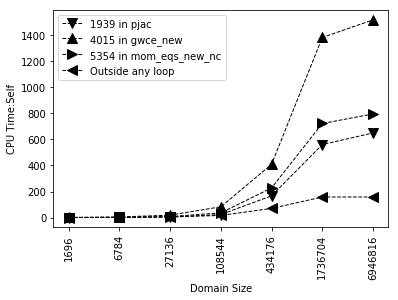

In [229]:
topdown_files = os.listdir("./scaling/topdown")
hwevents_files = os.listdir("./scaling/hwevents")
topdown_files = ["./scaling/topdown/%s" % a for a in topdown_files]
hwevents_files = ["./scaling/hwevents/%s" % a for a in hwevents_files]
topdown = VtuneCSV(topdown_files)
hwevents = VtuneCSV(hwevents_files)


#df1 = topdown.get_frame("1939 in pjac", "CPU Time:Self")
#df2 = topdown.get_frame("4015 in gwce_new", "CPU Time:Self")
[print(a) for a in set(list(topdown.data[0].index))]

metric="CPU Time:Self"
df1 = topdown.get_frame("1939 in pjac", metric)
df2 = topdown.get_frame("4015 in gwce_new", metric)
df3 = topdown.get_frame("5354 in mom_eqs_new_nc", metric)
df4 = topdown.get_frame("Outside any loop", 'CPU Time:Self')


#x = list(df.index)
#y = list(df.iloc[:,0])

n = len(df1)

ax1 = plt.plot(np.arange(n),df1, linewidth=1, color='black', marker='v', markersize=10, linestyle='--')
ax2 = plt.plot(np.arange(n),df2, linewidth=1, color='black', marker="^", markersize=10, linestyle='--')
ax3 = plt.plot(np.arange(n),df3, linewidth=1, color='black', marker=">", markersize=10, linestyle='--')
ax4 = plt.plot(np.arange(n),df4, linewidth=1, color='black', marker="<", markersize=10, linestyle='--')


lgd = plt.legend([df1.index.name, df2.index.name, df3.index.name, df4.index.name], loc='best')
plt.xticks(np.arange(len(x)), x, rotation='vertical')
plt.xlabel("Domain Size")
plt.ylabel("CPU Time:Self")
plt.title("")

plt.show()
#print(df1)
#print(df2)

#topdown.get_frame("4015 in gwce_new", "CPU Time:Total").plot()
#plt.show()1